<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/ML2_Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão Linear

## Definição:

Em estatística ou econometria, regressão linear é uma equação para se estimar a condicional (valor esperado) de uma variável y, dados os valores de algumas outras variáveis x.

A regressão, em geral, tem como objectivo tratar de um valor que não se consegue estimar inicialmente.

A regressão linear é chamada "linear" porque se considera que a relação da resposta às variáveis é uma função linear de alguns parâmetros. Os modelos de regressão que não são uma função linear dos parâmetros se chamam modelos de regressão não-linear. Sendo uma das primeiras formas de análise regressiva a ser estudada rigorosamente, e usada extensamente em aplicações práticas. 





###Equação:
![Representação Gráfica](https://www.nosimpler.me/wp-content/uploads/2016/11/lr-formula-300x225.png)

Uma reta por ser representada por uma equação do tipo $\hat{Y} = b X_1$ + a, onde $\hat{y}$ é o valor que estamos querendo prever.

Para saber o "quão boa" uma reta é, ou seja, se ela é ideal para representar os nosso pontos, podemos calcuar o erro quadrático médio (*Mean Squared Error* - MSE) para todos os pontos.

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Basicamente, essa equação calcula a distância de cada ponto até a reta. Quanto menor for esse valor, melhor é a nossa solução. O algoritmo do `scikit-learn` efetua todos os cálculos para minimizar esse valor ao máximo para nós. Quando ele encontra esse valor *ótimo*, armazena os valores dos coeficientes e do intercepto como atributo da variável.

## Aplicações Práticas:

Se você já vendeu qualquer coisa, sabe que é difícil definir um bom preço de venda. Muitas vezes colocamos o preço barato demais (e vendemos na hora) e algumas vezes colocamos o preço tão alto que não aparece nenhum interessado sequer. Se formos falar de imóveis, aí temos vários fatores complicadores.

Para demonstrar uma aplicação prática de um modelo de Machine Learning utilizando Regressão Linear irei utilizar o dataset [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) disponível para download no Kaggle, referente a cidade de Ames, uma cidade localizada no estado americano de Iowa.

Adiante irei demonstrar os passos para utilização do algoritimo 'scikit-learn' aplicando ao modelo de regressão linear.




###Importando o dataset diretamente do Kraggle

In [ ]:
#!pip install kaggle;

from google.colab import files
files.upload() #enviar o arquivo kaggle.json

#antes de importar o dataset nós iremos provisionar o local de armazenamento
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#Aceitar a competição e copiar o endereço da API para o download do dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques

#Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip

Saving kaggle.json to kaggle (1).json
  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 49.5MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt

# importar o arquivo
df = pd.read_csv("train.csv")

# ver as primeiras entradas
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Como esse caso será um exemplo simples, iremos utilizar apenas as variáveis  `GrLivArea` contendo o tamanho do imóvel ($m^2$) e a variável alvo `SalePrice` com o preço de venda do mesmo.

In [ ]:
df1 = df[['GrLivArea','SalePrice']].copy()

In [ ]:
df1.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


Vou plotar um gráfico de dispersão para termos ideia de como os pontos estão relacionados.



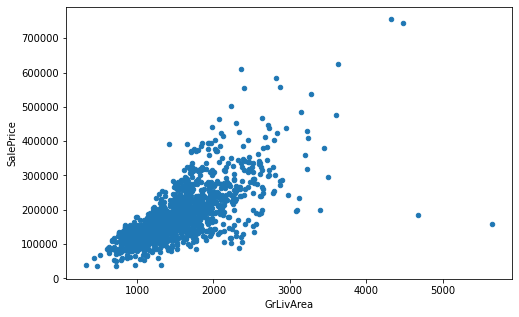

In [ ]:
# plotar gráfico de dispersãp.
fig, ax = plt.subplots(figsize=(8,5))
df1.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax)
plt.show()

## Regressão Linear Simples com o `scikit-learn`

Uma vez que você tenha feito toda uma análise exploratória, definido variáveis e preparado os dados adequadamente, chegou o momento de construir a Regressão Linear Simples.

Em competições do Kaggle, normalmente são fornecidos dados de treino e teste. Já no mundo real, você deve dividir o seu conjunto entre *train* e *test* de maneira que eles sejam mutuamente exclusivos.

Essa etapa é de extrema importância, pois vai tornar o modelo mais genérico e com melhor precisão em relação aos dados novos que venham a ser entrada do mesmo. 

Deliberadamente, apenas como exemplo irei serapara este *dataset*, em 20% dos dados para o teste no final. Entretanto se você consultar os arquivos baixados nos passos anteriores verá que existe um arquivo chamado test.csv original do Kraggle (para tanto use o comando 'ls').

In [ ]:
# importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Iremos separar a variável dependente (`SalePrice`) da nossa *feature*, e usar a função `train_test_split` para fazer a divisão entre dados de treino e teste.

In [ ]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Instanciar e escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df1['GrLivArea']
y = df1['SalePrice']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

ValueError: ignored

Mais importante que se desesperar é entender o que aconteceu. A mensagem de erro acima é por causa do `sklearn.pipeline` do pacote. Ela acontece porque passamos apenas uma variável (*feature*) na variável `X`. Veja esta parte da mensagem do erro:


> *...if your data has a single feature or array.reshape(1, -1)*

Uma coisa que você deve se lembrar é que o `scikit-learn` espera duas coisas nesta etapa:

* Que a variável `X` seja sempre um `np.array` com **duas dimensões**
* Que a variável `y` seja sempre um `np.array` com **uma dimensão**

Olhe os `prints` abaixo para ver as dimensões de cada variável nossa e ver que não estão de acordo com o que o pacote espera.

In [ ]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("X (reshape):\t",X.values.reshape(-1,1).shape)

print("y:\t\t", y.shape)

df:		 (1460, 81)
X:		 (1460,)
X (reshape):	 (1460, 1)
y:		 (1460,)


Isso é fácil de resolver. Quando for preciso mudar a dimensão de um *array* para atender a condição acima, use `.reshape(-1,1)`.

In [ ]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector
X = df1['GrLivArea'].values.reshape(-1,1)
y = df1['SalePrice']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Se estamos falando de Regressão Linear, estamos falando de construir reta. Essa reta possui coeficientes associados com os ângulos de inclinação e intercepto. Neste caso específico da Regressão Linear Simples, temos apenas um coeficiente de regressão.

Para obtermos os coeficiente de regressão e intercepto, basta acessar os atributos do modelo diretamente da variável ml_model.

In [ ]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [107.90630343]
Intercepto:	 15819.546682887216


Como estamos trabalhando com um problema de baixa dimensionalidade, é possível plotar a nossa reta, obtida pelo modelo de Machine Learning sobre os dados do nosso dataset. Veja como ela representa bem nosso conjunto de pontos.



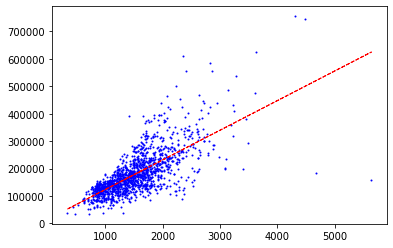

In [ ]:
# plotar reta e dados
fig, ax = plt.subplots()
ax.scatter(X, y, s=1, color='blue')
ax.plot(X, (model.coef_ * X + model.intercept_), '--r', linewidth=1);

Com o modelo treinado, ele já está pronto para fazer previsões em cima de dados novos. Como separamos lá em cima dos dados de teste na variável y_test, vamos fazer as previsões usando o método predict() e armazenar na variável y_pred.

In [ ]:
# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

Tem uma frase muito conhecida na área de Gestão de Projetos que diz que "você não controla o que não pode medir".

Um modelo de Machine Learning deve ser quantificável, seja em termos de desempenho ou precisão. No caso de modelos de Regressão, Vamos testar o desempenho do modelo em cima do nosso conjunto de testes usando as métricas abaixo:

R-Squared - métrica popularmente usada para calcular a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1. No caso, a melhor pontuação que seu modelo pode atingir é 1.

Mean Absolut Error (MAE) - é a média absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre pontos e retas).

Mean Squared Error (MSE) - é a média dos quadrados dos error e provavelmente a métrica mais conhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes.

In [ ]:
# avaliar o desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.46072390734872914
MAE:		 39002.270581381425
MSE:		 3560706432.5681705


## Regressão Linear Múltipla

O raciocínio usado na Regressão Linear Múltipla é exatamente o mesmo que vimos com a anterior. A diferença é que temos mais variáveis independentes para considerar no nosso modelo.

Para demonstrar como implementá-la, vou usar o *dataset* completo que importamos no passo anterior.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Tratando os Dados

Vamos tratar o *dataset*, primeiramente iremos excluir as colunas que possuem dados sobre caracterísitcas (não numéricos), depois iremos remover as colunas que não estão completas (que apresentam dados ausentes = NaN).

In [ ]:
#remover colunas que contém dados não numéricos
cols_to_remove = []

for col in df.columns:
    try:
        _ = df[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass

df = df[[col for col in df.columns if col not in cols_to_remove]]
df.drop('Id', axis=1, inplace=True)
df.head()

Couldn't covert MSZoning to float
Couldn't covert Street to float
Couldn't covert Alley to float
Couldn't covert LotShape to float
Couldn't covert LandContour to float
Couldn't covert Utilities to float
Couldn't covert LotConfig to float
Couldn't covert LandSlope to float
Couldn't covert Neighborhood to float
Couldn't covert Condition1 to float
Couldn't covert Condition2 to float
Couldn't covert BldgType to float
Couldn't covert HouseStyle to float
Couldn't covert RoofStyle to float
Couldn't covert RoofMatl to float
Couldn't covert Exterior1st to float
Couldn't covert Exterior2nd to float
Couldn't covert MasVnrType to float
Couldn't covert ExterQual to float
Couldn't covert ExterCond to float
Couldn't covert Foundation to float
Couldn't covert BsmtQual to float
Couldn't covert BsmtCond to float
Couldn't covert BsmtExposure to float
Couldn't covert BsmtFinType1 to float
Couldn't covert BsmtFinType2 to float
Couldn't covert Heating to float
Couldn't covert HeatingQC to float
Couldn't cov

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
#remover colunas com dados ausentes
df.drop('LotFrontage', axis=1, inplace=True)
df.drop('GarageYrBlt', axis=1, inplace=True)
df.drop('MasVnrArea', axis=1, inplace=True)

In [ ]:
df.shape

(1460, 34)

Mantivemos as 1460 entradas, porém temos agora 34 *features*. 

### Implementando o Modelo Múltiplo

In [ ]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

Dê uma paradinha agora e compare com o exemplo da Regressão Linear Simples. Qual a diferença?

Quando tentamos passar uma única feature, era passada uma estrutura de apenas uma dimensão, o que fazia o scikit-learn a dar um erro. No entanto, quando usamos mais de uma feature, já temos objetos de duas dimensões sem a necessidade de redimensionar. Veja os prints abaixo para ver as dimensões de cada variável nossa e comparar com o exemplo anterior.



In [ ]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("y:\t\t", y.shape)

df:		 (1460, 34)
X:		 (1460, 33)
y:		 (1460,)


Se na Regressão Linear Simples tínhamos apenas um coeficiente e um intercepto, agora temos um coeficiente para cada variável. Para obtermos os coeficientes de regressão e o intercept, podemos acessar os atributos do modelo diretamente da variável ml_model.



In [ ]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [-1.34442183e+02  5.51374482e-01  1.59144208e+04  4.24297678e+03
  3.29619359e+02  1.48779703e+02  2.31893779e+01 -1.95588354e+00
 -5.00210602e-02  2.11834733e+01  2.22628410e+01  3.11688733e+01
 -2.65665541e+01  2.68651603e+01  3.30871183e+03 -1.85760193e+03
  4.68891299e+02 -1.39187979e+03 -1.36380076e+04 -1.11480414e+04
  5.95998986e+03  3.37088627e+03  3.52323035e+03  2.07557245e+01
  1.95836608e+01 -1.95789256e+00 -1.40419690e+01  5.40217607e+01
  5.30463443e+01  2.53137634e+01 -1.18105707e+00 -1.72624051e+02
 -5.63469787e+02]
Intercepto:	 130388.44560276484


Vamos testar o desempenho do modelo em cima do nosso conjunto de testes. Para isso, vou colocar a variável X_test como argumento do ml_model.predict(), salvar as previsões e verificar o desempenho em cima das métricas já apresentadas.

In [ ]:
# verificar desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.6642490239951672
MAE:		 22454.027146608852
MSE:		 2094335416.9203696


---
# Data Science na Prática

Como parte da provocação feita no curso de **Data Science na Prática** fui desafiado a explicar os passos e ferramentas utilizadas para análise de um dataset utilizando o modelo de Regressão Linear.


Quer saber mais sobre o **curso**? Basta seguir o link:
<center>
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">


## **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*
</center>

---